In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [18]:
df = pd.read_csv('Base de Datos.csv', delimiter=';', error_bad_lines=False)
df1=  df[(df['COD_REG_RBD'] == 7) | (df['COD_REG_RBD'] == 15)]
df1.drop_duplicates
df1.dropna
df1

/var/folders/xx/8ljg54gs66gdzlm3grgkg2vr0000gn/T/ipykernel_8602/4236870006.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('Base de Datos.csv', delimiter=';', error_bad_lines=False)
Skipping line 297: expected 47 fields, saw 48



,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,...,DC_SUP_SOST,HH_SUP_SOST,DC_SUBDIR,HH_SUBDIR,DC_PROF_ENC,HH_PROF_ENC,DC_EDUC_TRAD,HH_EDUC_TRAD,DC_TOT,HH_TOT
0,2023,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,0,0,0,0,0,0,0,0,71,2393
1,2023,2,7,PARVULARIO LAS ESPIGUITAS,15,AYP,151,15101,ARICA,151,...,0,0,0,0,0,0,0,0,15,530
2,2023,3,5,ESC. PEDRO VICENTE GUTIERREZ TORRES,15,AYP,151,15101,ARICA,151,...,0,0,0,0,0,0,0,0,27,1078
3,2023,4,3,LICEO OCTAVIO PALMA PEREZ,15,AYP,151,15101,ARICA,151,...,0,0,0,0,0,0,0,0,69,2727
4,2023,5,1,JOVINA NARANJO FERNANDEZ,15,AYP,151,15101,ARICA,151,...,0,0,0,0,0,0,0,0,63,2414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16560,2023,42036,0,ESCUELA DE LENGUAJE MI MUNDO EN PALABRAS,7,MAULE,74,7402,COLBÚN,73,...,0,0,0,0,0,0,0,0,5,201
16569,2023,42048,4,ESCUELA ESPECIAL DE LENGUAJE GRANJERITOS,7,MAULE,71,7108,RÍO CLARO,72,...,0,0,0,0,0,0,0,0,0,0
16579,2023,42066,2,SALA CUNA AYELEN LINARES,7,MAULE,74,7401,LINARES,73,...,0,0,0,0,0,0,0,0,0,0
16607,2023,42114,6,ESCUELA DE LENGUAJE ACUARELA,7,MAULE,71,7105,MAULE,72,...,0,0,0,0,0,0,0,0,4,77


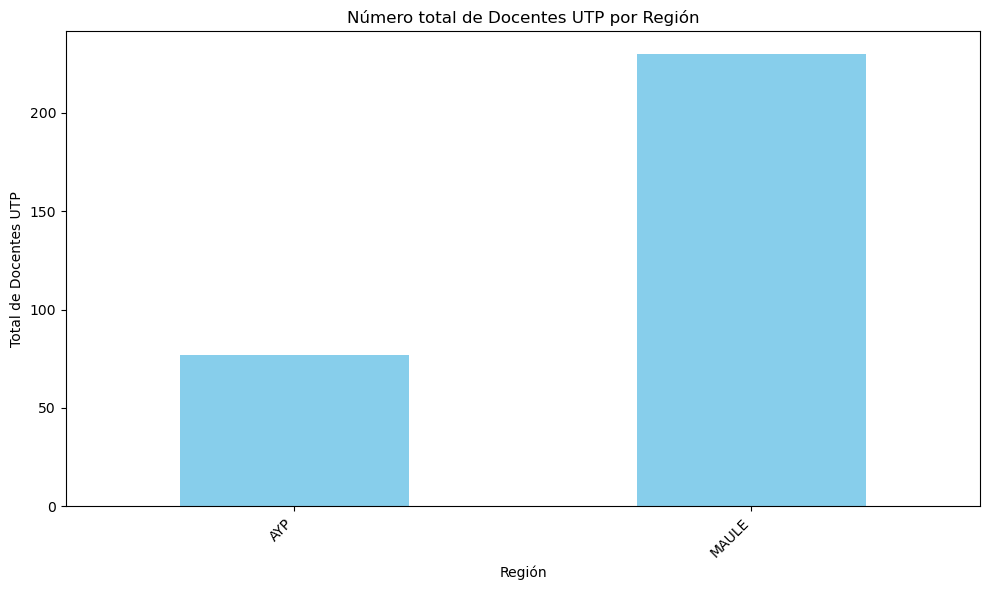

In [19]:
docentes_por_region = df1.groupby('NOM_REG_RBD_A')['DC_UTP'].sum().sort_values()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
docentes_por_region.plot(kind='bar', color='skyblue')
plt.title('Número total de Docentes UTP por Región')
plt.xlabel('Región')
plt.ylabel('Total de Docentes UTP')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
tipos_establecimiento = [1, 2, 3, 4]  # REVISA ESTO IGUAL SI CONSIDERE LOS MUNICIPALES DAEM
datos_filtrados = df1[df1['COD_DEPE'].isin(tipos_establecimiento)]

# Crear la tabla de contingencia
tabla_contingencia = pd.crosstab(datos_filtrados['COD_DEPE'], datos_filtrados['DC_UTP'])

# Realizar el test de independencia chi-cuadrado
chi2, p_valor, _, _ = chi2_contingency(tabla_contingencia)

# Reportar la tabla de frecuencias observadas y esperadas
print("Tabla de frecuencias observadas:")
print(tabla_contingencia)
print("\nTabla de frecuencias esperadas:")
print(pd.DataFrame(_, index=tabla_contingencia.index, columns=tabla_contingencia.columns))

# Reportar el p-valor y concluir
print(f"\nEl p-valor obtenido es: {p_valor}")
alpha = 0.05
if p_valor < alpha: #REVISA SI ESTA CONCLUSION ESTÁ BIEN O SINO CAMBIA EL < POR UN > PARA INVERTIR LAS CONCLUSIONES
    print("Se rechaza la hipótesis nula. Existe evidencia suficiente para concluir que hay una relación entre el tipo de establecimiento y el número de docentes UTP.")
else:
    print("No se puede rechazar la hipótesis nula. No hay suficiente evidencia para concluir que hay una relación entre el tipo de establecimiento y el número de docentes UTP.")

Tabla de frecuencias observadas:
DC_UTP     0   1   2   3   4   5   6   10  11  16
COD_DEPE                                         
2         638  49  17   3   1   3   0   0   0   0
3         406  48  18   7   5   1   1   1   1   1
4          64   6   1   0   1   0   0   0   0   0

Tabla de frecuencias esperadas:
DC_UTP            0          1          2         3         4         5   \
COD_DEPE                                                                   
2         619.330189  57.573113  20.122642  5.589623  3.912736  2.235849   
3         425.952830  39.596698  13.839623  3.844340  2.691038  1.537736   
4          62.716981   5.830189   2.037736  0.566038  0.396226  0.226415   

DC_UTP          6         10        11        16  
COD_DEPE                                          
2         0.558962  0.558962  0.558962  0.558962  
3         0.384434  0.384434  0.384434  0.384434  
4         0.056604  0.056604  0.056604  0.056604  

El p-valor obtenido es: 0.17718753194908837
No 

/var/folders/xx/8ljg54gs66gdzlm3grgkg2vr0000gn/T/ipykernel_8602/838715234.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_filtrados['COD_DEPE'] = datos_filtrados['COD_DEPE'].map(mapping)


<Figure size 10000x800 with 0 Axes>

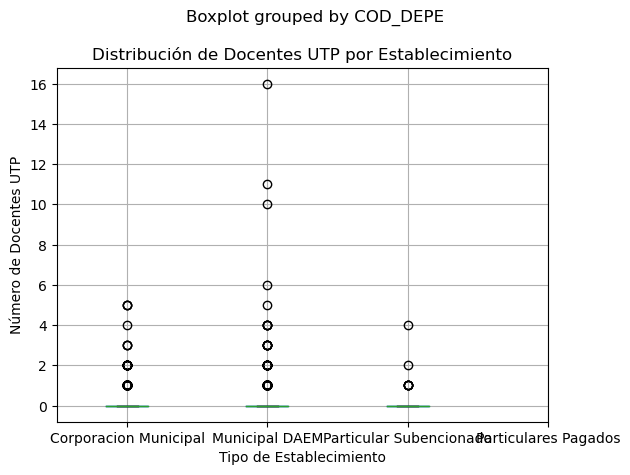

In [22]:
tipos_establecimiento = [1,2,3,4]  # REVISA ESTO IGUAL SI CONSIDERE LOS MUNICIPALES DAEM
datos_filtrados = df1[df1['COD_DEPE'].isin(tipos_establecimiento)]


# Mapeo para cambiar los códigos de establecimiento por nombres
mapping = {1:"Corporacion Municipal",2:"Municipal DAEM", 3: 'Particular Subencionado', 4: 'Particulares Pagados'}
datos_filtrados['COD_DEPE'] = datos_filtrados['COD_DEPE'].map(mapping)


plt.figure(figsize=(100,8))
datos_filtrados.boxplot(column='DC_UTP', by='COD_DEPE')
plt.title('Distribución de Docentes UTP por Establecimiento')
plt.xlabel('Tipo de Establecimiento')
plt.ylabel('Número de Docentes UTP')
plt.xticks([1, 2, 3, 4], ["Corporacion Municipal", "Municipal DAEM", "Particular Subencionado", 'Particulares Pagados'])
plt.tight_layout()
plt.show()